In [50]:
# -*- coding: utf-8 -*-
import logging
from pathlib import Path

import pandas as pd
import numpy as np

import cloudpickle
import click

import numpy as np

import matplotlib.pyplot as plt

In [51]:
models = '../models'

In [52]:
model_file = Path(models) / 'logistic_model.pkl'
with open(model_file, 'rb') as fp:
    fitted_model = cloudpickle.load(fp)

In [53]:
grid_results = fitted_model.cv_results_

In [54]:
grid_results

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3],
 'n_resources': [38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  38644,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  115932,
  347796,
  347796,
  347796,
  347796,
  347796,
  1043388,
  1043388],
 'mean_fit_ti

In [55]:
AUC = grid_results['mean_test_score']

alpha


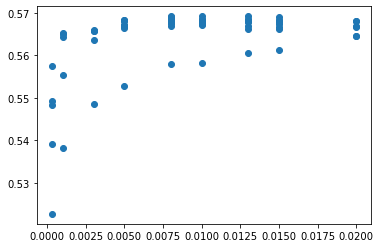

l1_ratio


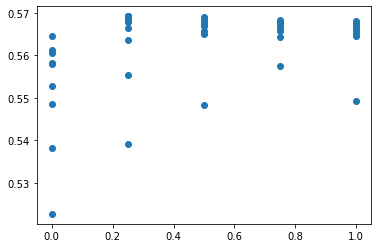

{'alpha': array([0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.001 , 0.001 , 0.001 ,
        0.001 , 0.001 , 0.003 , 0.003 , 0.003 , 0.003 , 0.003 , 0.005 ,
        0.005 , 0.005 , 0.005 , 0.005 , 0.008 , 0.008 , 0.008 , 0.008 ,
        0.008 , 0.01  , 0.01  , 0.01  , 0.01  , 0.01  , 0.013 , 0.013 ,
        0.013 , 0.013 , 0.013 , 0.015 , 0.015 , 0.015 , 0.015 , 0.015 ,
        0.02  , 0.02  , 0.02  , 0.02  , 0.02  , 0.005 , 0.005 , 0.005 ,
        0.015 , 0.01  , 0.01  , 0.008 , 0.008 , 0.013 , 0.01  , 0.015 ,
        0.02  , 0.013 , 0.008 , 0.01  , 0.015 , 0.008 , 0.013 , 0.01  ,
        0.008 , 0.008 , 0.01  ]),
 'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  ,
        0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25,
        0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 ,
        0.75, 1.  , 0.  , 0.25, 0.5 , 0.75, 1.  , 0.  , 0.25, 0.5 , 0.75,
        1.  , 0.75, 1.  , 0.5 , 0.5 , 1.  , 0.75, 1.  , 0.5 , 0.5 , 0.5 ,

In [56]:
param_dict = {}
for key, value in grid_results.items():
    if 'param_clf__' in key:
        name = key.replace('param_clf__', '')
        new = np.array(np.ma.getdata(grid_results[key]), dtype=np.float)
        param_dict[name] = new
        print(name)
        plt.figure()
        plt.scatter(new, AUC)
        plt.show()

param_dict

In [57]:
print("Best: %f using %s" % (fitted_model.best_score_, 
    fitted_model.best_params_))

Best: 0.568013 using {'clf__alpha': 0.008, 'clf__l1_ratio': 0.25}


In [32]:
fitted_model.cv_results_

{'iter': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2],
 'n_resources': [115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  115934,
  347802,
  347802,
  347802,
  347802,
  347802,
  347802,
  1043406,
  1043406],
 'mean_fit_time': array([ 5.60319376,  6.06207228,  4.08748741,  4.20365534,  3.98684564,
         3.92880998,  4.71496668,  4.47687759,  4.7609345 ,  4.1353981 ,
         4.34986467,  3.69013987,  3.83899207,  3.54619555,  3.83384185,
         3.49562669, 23.69470983, 26.16777439, 24.88613214, 23.84288378,
        22.59104829, 18.51845112, 89.54279356, 73.32008057]),
 'std_fit_time': array([ 0.39299005,  0.3797495 ,  0.16034771,  0.09568206,  0.04525962,
         0.0294444 ,  0.50944125,  0.06726722,  0.08830397,  0.13638394,
         0.16678259,  0.1079225 ,  0.04963164,  0.08146271,  0.03387354,
       

In [33]:
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
learning_rates = np.ma.getdata(grid_results['param_clf__learning_rate'])
# alphas = np.ma.getdata(grid_results['param_clf__alpha'])
# rates = np.ma.getdata(grid_results['param_clf__optimizer__learning_rate'])
# dims = np.ma.getdata(grid_results['param_clf__hidden_layer_dim'])
# b_size = np.ma.getdata(grid_results['param_clf__batch_size'])
# opts = np.ma.getdata(grid_results['param_clf__optimizer'])

KeyError: 'param_clf__learning_rate'

In [32]:
log_rates =np.log(rates)

NameError: name 'rates' is not defined

In [33]:
df = pd.DataFrame(np.stack((log_rates, dims, AUC), axis=-1))

NameError: name 'log_rates' is not defined

In [34]:
df.columns = ['log_rates', 'dims', 'auc']

NameError: name 'df' is not defined

NameError: name 'df' is not defined

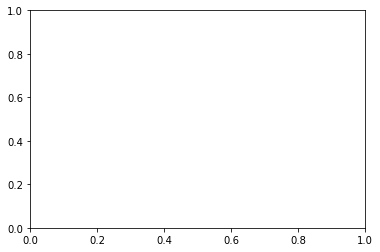

In [35]:
fig, ax2 = plt.subplots(1,1);
df.groupby('dims').plot('log_rates', 'auc', ax=ax2)
plt.legend([v[0] for v in df.groupby('dims')['dims']])

In [36]:
alphas = np.array(alphas, dtype=np.float)
log_alphas =np.log(alphas)
plt.scatter(log_alphas, AUC)

NameError: name 'alphas' is not defined

In [37]:
plt.scatter(log_rates, AUC)

NameError: name 'log_rates' is not defined

In [38]:
plt.scatter(opts, AUC)

NameError: name 'opts' is not defined

Best: 0.497589 using {'clf__learning_rate': 0.01, 'clf__max_iter': 400}
